# Business Understanding
I looked Boston Airbnb's pricing data and asked the following questions.

1. Is there a seasonality to prices?
2. What rooms raised their prices during the event?
3. What's the difference between high and low room?
4. What is the difference of Boston and Seattle

Use these datasets of calendar and listing.
* Boston Airbnb
  * https://www.kaggle.com/airbnb/boston
* Seattle Airbnb
  * https://www.kaggle.com/airbnb/seattle


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Data Understing

In [2]:
def strip_dollar(string_num):
    '''
    convert price string with dollar notation to float like '$1,250'
    Parameters
    ----------
    string_num: string
        A numeric value written as a string.
    Returns
    -------
    float_num: float
        Converted from string to float
    '''
    if string_num == '':
        return np.NaN
    return np.float(string_num.replace('$', '').replace(',', ''))

In [3]:
# Calendar
seattle_cal = pd.read_csv('./data/seattle/calendar.csv',
                          index_col='date', parse_dates=['date'],
                          converters={'price': strip_dollar})
boston_cal = pd.read_csv('./data/boston/calendar.csv',
                         index_col='date', parse_dates=['date'],
                         converters={'price': strip_dollar})
# Listings
seattle_list = pd.read_csv('./data/seattle/listings.csv',
                           converters={'price': strip_dollar})
boston_list = pd.read_csv('./data/boston/listings.csv',
                          converters={'price': strip_dollar})

## Calendar

In [4]:
boston_cal

,listing_id,available,price
date,,,
2017-09-05,12147973,f,NaN
2017-09-04,12147973,f,NaN
2017-09-03,12147973,f,NaN
2017-09-02,12147973,f,NaN
2017-09-01,12147973,f,NaN
...,...,...,...
2016-09-10,14504422,f,NaN
2016-09-09,14504422,f,NaN
2016-09-08,14504422,f,NaN


In [5]:
# label of "available"
boston_cal['available'].unique()

array(['f', 't'], dtype=object)

In [6]:
# available is "t"
boston_cal[boston_cal['available'] == 't']

,listing_id,available,price
date,,,
2017-08-22,3075044,t,65.0
2017-08-21,3075044,t,65.0
2017-08-20,3075044,t,65.0
2017-08-19,3075044,t,75.0
2017-08-18,3075044,t,75.0
...,...,...,...
2016-09-20,14504422,t,62.0
2016-09-19,14504422,t,62.0
2016-09-18,14504422,t,62.0


In [7]:
boston_cal_t = boston_cal[boston_cal['available'] == 't']

In [8]:
# sum of price is null
boston_cal_t['price'].isnull().sum()

0

When "available" is "t", the dataset has "price", so I can get the price of available rooms.

And It's a timeseriese dataset, if plot the price by time, I can see the price trends.

There are no null value of price, when available.

## listings

In [9]:
boston_list

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


In [10]:
boston_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

There are so many columns.

In order to focus on price this time, I will extract columns that may be related to price.<br>

The columns are:
* 'property_type'
* 'room_type'
* 'accommodates'
* 'bathrooms'
* 'bedrooms'
* 'beds'
* 'price'

In [11]:
# null counts
print('property_type:', boston_list['property_type'].isnull().sum())
print('room_type    :', boston_list['room_type'].isnull().sum())
print('accommodates :', boston_list['accommodates'].isnull().sum())
print('bathrooms    :', boston_list['bathrooms'].isnull().sum())
print('bedrooms     :', boston_list['bedrooms'].isnull().sum())
print('beds         :', boston_list['beds'].isnull().sum())
print('price        :', boston_list['price'].isnull().sum())

property_type: 3
room_type    : 0
accommodates : 0
bathrooms    : 14
bedrooms     : 10
beds         : 9
price        : 0


Since there are few missing values, I ignore them.

## Prepare the Data

In [12]:
# choose columns
seattle_list = seattle_list[['id', 'property_type', 'room_type',
                             'accommodates', 'bathrooms',
                             'bedrooms', 'beds', 'price']]
boston_list = boston_list[['id', 'property_type', 'room_type', 'accommodates',
                           'bathrooms', 'bedrooms', 'beds', 'price']]

In [13]:
# Calendar price
boston_cal_price =\
    boston_cal[boston_cal['available'] == 't'][['listing_id', 'price']]
seattle_cal_price =\
    seattle_cal[seattle_cal['available'] == 't'][['listing_id', 'price']]

# Question 1: Is there a seasonality to prices? 
And when are they most expensive?

# Boston Price Calendar
Let's take a look at the day-to-day changes in the mean price of Boston

In [14]:
boston_price_d = boston_cal_price['price'].resample('D')

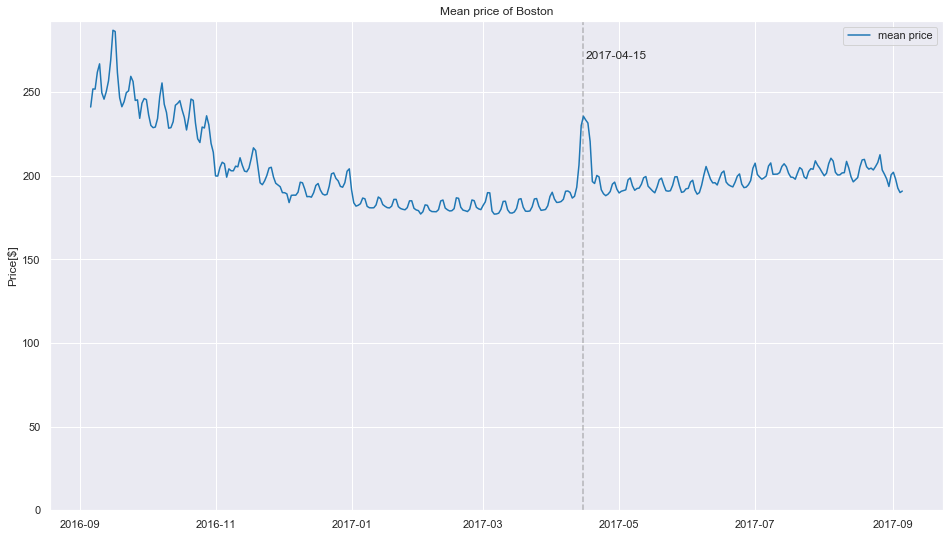

In [15]:
plt.figure(figsize=(16, 9))
plt.title('Mean price of Boston')
plt.plot(boston_price_d.mean(), label='mean price', color='tab:blue')
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)
plt.ylabel('Price[$]')
plt.vlines('2017-04-15', 0, ymax, linestyle='--', color='tab:gray', alpha=0.5)
plt.gca().annotate('2017-04-15', xy=('2017-04-16', 270))
plt.legend()
plt.show()

## Observation of Boston price
* Prices are dropping rapidly over 2017-01.
* After that, there is a slow upward trend.
* But, there are price peak around 2017-04-15~2017-04-17.
* And, periodic small peaks are observed.

## About periodic peaks
It's a weekly period of Fridy and Saturaday<br>
It seems natural that weekend room rates would go up.

In [ ]:
plt.figure(figsize=(16, 9))
boston_mean = boston_price_d.mean()
plt.plot(boston_mean[boston_mean.index.weekday.isin([4, 5])],
         marker='o', linewidth=0, color='tab:blue',
         label='Friday and Saturaday')
plt.plot(boston_mean, color='tab:blue', label='mean price')
plt.legend()
plt.ylim(0, ymax)
plt.ylabel('Price[$]')
plt.show()

## What is the big peak at 2017-04
I googled to see if there were any major events in Boston in April 2017.<br>
Then I found Boston Marathon was held at April 17.<br>
May be it's a cause of price peak of 2017-04-14 to 2017-04-16.

# Question 2: What rooms raised their prices during the event?
I've found that prices go up depending on the event.<br>
I wonder if all the rooms will have their prices increased, or just some of them.

In [ ]:
# max price during 2017-04-14 to 2017-04-17
boston_cal_price_max =\
    boston_cal_price['2017-04-14':'2017-04-17'].groupby('listing_id').max()

In [ ]:
# difference between listing price and calendar price
boston_price_diff =\
    boston_cal_price_max.reset_index().merge(boston_list[['id', 'price']],
                                             left_on='listing_id',
                                             right_on='id',
                                             suffixes=['_after', '_before'])
boston_price_diff['diff'] =\
    boston_price_diff['price_after'] - boston_price_diff['price_before']

## Mean price of listing and during event

In [ ]:
plt.bar(['listing'], [boston_price_diff['price_before'].mean()])
plt.bar(['on event'], [boston_price_diff['price_after'].mean()])
plt.show()

In [ ]:
boston_price_diff['price_before'].mean()

In [ ]:
boston_price_diff['price_after'].mean()

## Distribution of price

In [ ]:
plt.figure(figsize=(16, 9))
sns.distplot(boston_price_diff['price_before'], label='listing')
sns.distplot(boston_price_diff['price_after'], label='on event')
plt.legend()
plt.show()

It seems the higher price are increasing.

## Check the quartile

In [ ]:
plt.figure(figsize=(16, 9))
x_range = np.arange(0, 1, 0.05)
plt.plot(x_range,
         [boston_price_diff['price_before'].quantile(x) for x in x_range],
         label='listing')
plt.plot(x_range,
         [boston_price_diff['price_after'].quantile(x) for x in x_range],
         label='on event')
plt.xlabel('quantile')
plt.ylabel('price[$]')
plt.legend()
plt.show()

The lower 50% of rooms have not increased in price significantly.<br>
But, hte top 50%, especially the top 25%, are making big price gains.

## Price changes lower 50% and top 25%

In [ ]:
threshold_b = boston_price_diff['price_before'].quantile(0.5)
threshold_a = boston_price_diff['price_after'].quantile(0.5)
price_before = boston_price_diff['price_before']
price_after = boston_price_diff['price_after']
lower_before =\
    boston_price_diff[price_before < threshold_b]['price_before'].mean()
lower_after =\
    boston_price_diff[price_after < threshold_a]['price_after'].mean()

plt.title('Lower 50%')
plt.bar(['listing'], [lower_before.mean()])
plt.bar(['on event'], [lower_after.mean()])
plt.show()

In [ ]:
threshold_b = boston_price_diff['price_before'].quantile(0.75)
threshold_a = boston_price_diff['price_after'].quantile(0.75)
top_before = boston_price_diff[price_before > threshold_b]['price_before'].mean()
top_after = boston_price_diff[price_after > threshold_a]['price_after'].mean()

plt.title('Top 25%')
plt.bar(['listing'], [top_before.mean()])
plt.bar(['on event'], [top_after.mean()])
plt.show()

## Question 2 conclusion

The price spike due to the event was in rooms with listing prices as high as $200 or more.

# Question 3: What's the difference between high and low room?
Property type? num of beds? or other?

In [ ]:
# bottom 25%
boston_bottom =\
    boston_list[boston_list['price'] < boston_list['price'].quantile(0.25)]
# top 25%
boston_top =\
    boston_list[boston_list['price'] > boston_list['price'].quantile(0.75)]

## Number of beds
There are obviously more beds.

In [ ]:
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121)
ax1.set_title('bottom 25%')
ax1.bar(boston_bottom['beds'].value_counts().index,
        boston_bottom['beds'].value_counts().values, color='tab:blue')

ax2 = plt.subplot(122)
ax2.set_title('top 25%')
ax2.bar(boston_top['beds'].value_counts().index,
        boston_top['beds'].value_counts().values, color='tab:orange')
plt.show()

## Number of accomodates
"Accomodates" is too.

In [ ]:
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121)
ax1.set_title('bottom 25%')
ax1.bar(boston_bottom['accommodates'].value_counts().index,
        boston_bottom['accommodates'].value_counts().values, color='tab:blue')

ax2 = plt.subplot(122)
ax2.set_title('top 25%')
ax2.bar(boston_top['accommodates'].value_counts().index,
        boston_top['accommodates'].value_counts().values, color='tab:orange')
plt.show()

## Top 5 of Property Type
Top 3 are same, Apartment, House and Condominium.

In [ ]:
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121)
ax1.set_title('bottom 25%')
ax1.bar(boston_bottom['property_type'].value_counts().index[:5],
        boston_bottom['property_type'].value_counts().values[:5],
        color='tab:blue')

ax2 = plt.subplot(122)
ax2.set_title('top 25%')
ax2.bar(boston_top['property_type'].value_counts().index[:5],
        boston_top['property_type'].value_counts().values[:5],
        color='tab:orange')
plt.show()

## Room Type
There are significant difference.<br>
Bottom 25% rooms are mainly occupied by "Private room" but top 25% are "Entire home/apt".

In [ ]:
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121)
ax1.set_title('bottom 25%')
ax1.bar(boston_bottom['room_type'].value_counts().index,
        boston_bottom['room_type'].value_counts().values,
        color='tab:blue')

ax2 = plt.subplot(122)
ax2.set_title('top 25%')
ax2.bar(boston_top['room_type'].value_counts().index,
        boston_top['room_type'].value_counts().values,
        color='tab:orange')
plt.show()

## Question 3 conclusion
The difference in price was the size of the room.

Top 25% rooms are mainly entire home/apt and have many beds, so it can accommodate a lot of people.

# Question 4: What is the difference of Boston and Seattle
Is there a difference between Boston and Seattle, and if so, what is it?

## Number of rooms
It's almost same.

In [ ]:
print('Boston  :', boston_list.shape[0])
print('Seattle :', seattle_list.shape[0])

## Price
Boston has more rooms over $100.

Show only under $500.

In [ ]:
plt.figure(figsize=(16, 9))
sns.distplot(boston_list[boston_list['price'] < 500]['price'],
             label='Boston')
sns.distplot(seattle_list[seattle_list['price'] < 500]['price'],
             label='Seattle')
plt.legend()
plt.xlabel('Price[$]')
plt.show()

## What is the factor of the price
The price difference in Boston was the size of the room. <br>
So what is the reason for the difference between Boston and Seattle?

## Room Type
There are no difference betoween boston and seattle.

In [ ]:
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121)
ax1.set_title('Boston')
ax1.bar(boston_list['room_type'].value_counts().index,
        boston_list['room_type'].value_counts().values,
        color='tab:blue')

ax2 = plt.subplot(122)
ax2.set_title('Seattle')
ax2.bar(seattle_list['room_type'].value_counts().index,
        seattle_list['room_type'].value_counts().values,
        color='tab:orange')
plt.show()

## Number of accomodates
There are no significant difference too.

In [ ]:
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121)
ax1.set_title('Boston')
ax1.bar(boston_list['accommodates'].value_counts().index,
        boston_list['accommodates'].value_counts().values,
        color='tab:blue')

ax2 = plt.subplot(122)
ax2.set_title('Seattle')
ax2.bar(seattle_list['accommodates'].value_counts().index,
        seattle_list['accommodates'].value_counts().values,
        color='tab:orange')
plt.show()

The size of the room does not seem to be related to the difference in price.<br>
So what is the Factor?

I think the original price of the house may be different.<br>
So I decided to look up the price of the house, but I don't know how to do that since I am Japanese and don't live in the US.

Therefore, I thought that if Boston is more urban than Seattle, the price of houses would be higher.

## Population and Density of Boston and Seattle
It's from Wikipedia.

[Boston]https://en.wikipedia.org/wiki/Boston

[Seattle]https://en.wikipedia.org/wiki/Seattle

In [ ]:
boston_pop = 617594
boston_den = 5531.93
seattle_pop = 608660
seattle_den = 3464.55

In [ ]:
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121)
ax1.set_title('Population')
ax1.bar('Boston', boston_pop)
ax1.bar('Seattle', seattle_pop)

ax2 = plt.subplot(122)
ax2.set_title('Density[/km2]')
ax2.bar('Boston', boston_den)
ax2.bar('Seattle', seattle_den)

plt.show()

Population is almost same, but Boston is more densely populated.<br>
So that I think housing prices are higher in Boston.

# Question 4 conclusion
It was not possible to find out the actual housing prices.<br>

However, based on population density, Boston is considered to be more urban. 

Therefore, housing prices in Boston are expected to be higher.